In [ ]:
!pip install plotnine
!pip install --upgrade pip
!pip install matplotlib.typing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 26.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement matplotlib.typing (from versions: none)
ERROR: No matching distribution found for matplotlib.typing


In [ ]:
import numpy as np
import pandas as pd
from plotnine import *
from matplotlib import *
import matplotlib.pyplot as plt

In [ ]:
# Load SLOPD Data
slopd_df = pd.read_csv("/work/SLOPD_Data_Cleaned_Fixed.csv")

# Drop rows where any of the specified columns have missing values
slopd_df = slopd_df.dropna(subset=['Date', 'Received', 'Type', 'Address'])

slopd_df = slopd_df.drop_duplicates(subset='IncidentID', keep='first')

# Display the DataFrame to verify the rows were dropped
#print(slopd_df)

In [ ]:
unique_types = slopd_df['Type'].unique()
sorted(unique_types) # Sorted for easier manual inspection

['7raffic Hazard',
 '7raffic Offense',
 '7respassing',
 '9-1-1 ABANDON',
 '9-i-1 ABANDON',
 '911 Abandon',
 'ABAND VEHICLE',
 'Abandoned Vehicle',
 'Alarm Audible',
 'Alarm Fire',
 'Alarm Silent',
 'Alcohol Offense',
 'Animal Problem',
 'Assault',
 'Assist 0 Info',
 'Assist 0 Police',
 'Assist Police',
 'Assist Req',
 'Attempt Locate',
 'Attempt Theft',
 'BURG COM',
 'BURG RES',
 'BURG VEHICLE',
 'CALL IN',
 'COLL EXTRICATIO',
 'COLL FREEWAY',
 'COLL HIT AND RU',
 'COLL HIT AND RUN',
 'COLL INJ',
 'COLL NON INJ',
 'COLL NON IN]',
 "COLL' NON IN]",
 'Citizen Dispute',
 'Communications',
 'Controlled Narc',
 'Custodial Interference',
 'DUI',
 'Deceased Subject',
 'Disorderly',
 'Domestic Violence',
 'Elder Abuse/Neglect',
 'Electrical Hazard',
 'Embezzlement',
 'Fire Flames',
 'Fire Illegal Burn',
 'Fire Small Trash',
 'Fire Structure',
 'Fire Vehicle',
 'Fire Wildland',
 'Fireworks',
 'Found Property',
 'Fraud',
 'GRAFFITI',
 'Graffiti',
 'Information',
 'Juvenile Prob',
 'Keep the Peac

In [ ]:
# Define a map of substrings to standardized categories
type_map = {
    # Traffic-related
    "traffic": "Traffic Incident",
    "7raffic": "Traffic Incident",  # Handling common misspelling
    "dui": "DUI",
    "coll": "Traffic Incident",  # Collision
    "vehicle": "Traffic Incident",
    "parking": "Traffic Incident",
    "posting": "Traffic Incident",
    "coil": "Traffic Incident",
    # Theft-related
    "theft": "Theft",
    "burg": "Burglary",
    "robbery": "Robbery",
    #Trespass
    "tres": "Trespass",
    # Disturbance
    "disorderly": "Disturbance",
    "noise": "Noise Complaint",
    "party": "Noise Complaint",
    "domestic": "Domestic Incident",
    # Welfare checks
    "welfare": "Welfare Check",
    "assis": "Assistance Required",
    # Fire-related
    "fire": "Fire",
    "alarm": "Alarm",
    # Substance abuse
    "alcohol": "Substance Abuse",
    "mc-alcohol": "Substance Abuse",
    "narc": "Substance Abuse",
    # Vandalism
    "vandalism": "Vandalism",
    "graffiti": "Vandalism",
    # Loitering
    "loitering": "Loitering",
    # 9-1-1 Abandon
    "911 aband": "Disconnected 911 Call",
    # Mental health
    "mental": "Mental Health Incident",
    # Missing persons
    "missing": "Missing Person",
    # Public assistance
    "public": "Public Assistance",
    # Legal process
    "warrant": "Warrant",
    # Suspicious behavior
    "sus": "Suspicious",
    #Sex Offense
    "sex": "Sex Offense",
    #Fraud
    "fraud": "Fraud",
    # Municipal Code Violation
    "mc": "Municipal Code Violation",
    "muni": "Municipal Code Violation",
    # Assault
    "assau": "Assault",
    #Lost/Found Property
    "lost": "Lost/Found Property",
    "found": "Lost/Found Property",
    "property": "Lost/Found Property",
    #Juvenile Issues
    "juve": "Juvenile Problem",
    # Weapons
    "weap": "Weapon",
    # Information
    "informat": "Information",
    #Dispute
    "dispute": "Dispute"
    # Others can be added as needed
}

# Define a function to categorize types based on the mapping
def categorize_type_with_map(row):
    # Iterate over each item in the mapping
    for key, value in type_map.items():
        # Check if 'Type' contains the current key (case insensitive)
        if key in row['Type'].lower():
            return value
    # Return "Other" if no match is found
    return "Other"

# Apply the function to each row in the DataFrame
slopd_df['StandardizedType'] = slopd_df.apply(categorize_type_with_map, axis=1)

# Verify the results
slopd_df[['Type', 'StandardizedType']]

,Type,StandardizedType
0,Traffic Offense,Traffic Incident
1,Alarm Audible,Alarm
2,Assist Req,Assistance Required
3,911 Abandon,Disconnected 911 Call
4,Trespassing,Trespass
...,...,...
3272,Traffic Stop,Traffic Incident
3273,Suspicious,Suspicious
3274,MUNI CODE VIOL,Municipal Code Violation
3275,Suspicious,Suspicious


In [ ]:
type_counts = slopd_df['StandardizedType'].value_counts().reset_index()
type_counts.columns = ['StandardizedType', 'count']

print(type_counts)

            StandardizedType  count
0           Traffic Incident    530
1                 Suspicious    337
2      Disconnected 911 Call    326
3            Noise Complaint    248
4              Welfare Check    198
5        Assistance Required    185
6                Disturbance    175
7                   Trespass    174
8                  Loitering    144
9                      Alarm    133
10           Substance Abuse    107
11  Municipal Code Violation     95
12                     Theft     71
13                     Other     65
14       Lost/Found Property     65
15         Public Assistance     40
16                   Dispute     31
17                      Fire     30
18                 Vandalism     28
19               Information     24
20          Juvenile Problem     22
21                   Warrant     20
22                       DUI     20
23                  Burglary     19
24                   Assault     16
25                     Fraud     16
26               Sex Offense

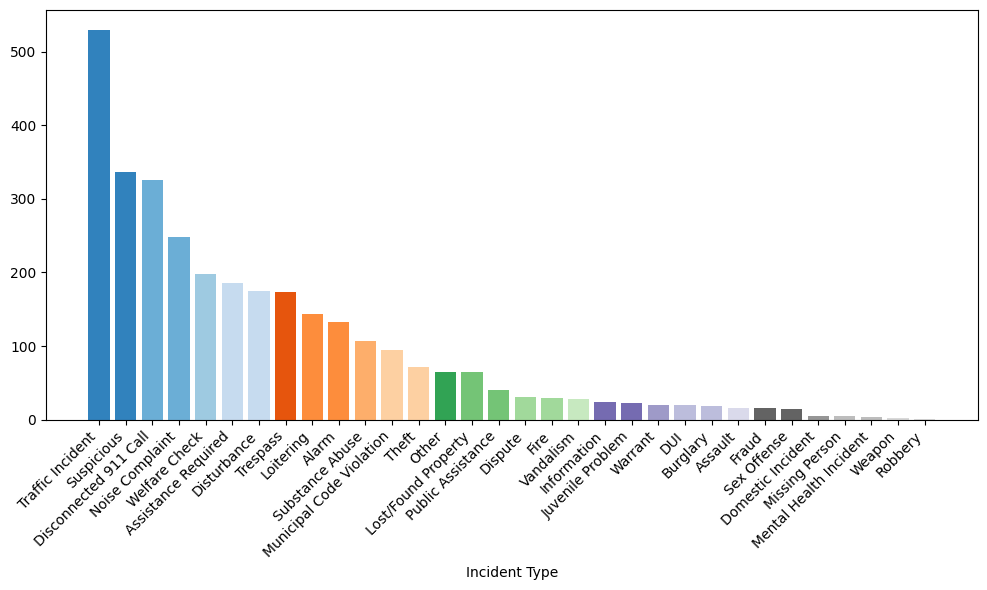

In [ ]:
# Define a list of colors
colors = plt.cm.tab20c(np.linspace(0, 1, len(type_counts['StandardizedType'])))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(type_counts['StandardizedType'], type_counts['count'], color=colors)
#plt.title('Number of Incidents by Type')
plt.xlabel('Incident Type')
#plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9248b781-5f69-46ac-962a-254d703b7672' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>